In [ ]:
#Anova

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# one way anova

In [11]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]



In [12]:
#generate random data
# Generate random data

#p - probability , size - number of samples
voter_race = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5],  size=1000) 

#loc mean
voter_age = stats.poisson.rvs(loc=18,  mu=30,  size=1000)



In [15]:
# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups



In [16]:
# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]


In [17]:
# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [ ]:
#Inference : 
#The test output yields an F-statistic of 1.774 and a p-value of 0.1317, 
#indicating that there is no significant difference between the means of each group.

In [ ]:
# Two way anova

In [19]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

In [20]:
# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

In [21]:

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

In [22]:
# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

In [ ]:
# inference : p value !< 0.05, cannot reject H0.
# all the mean are same

In [ ]:
# Pairwise - Tukey's test

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [24]:
tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

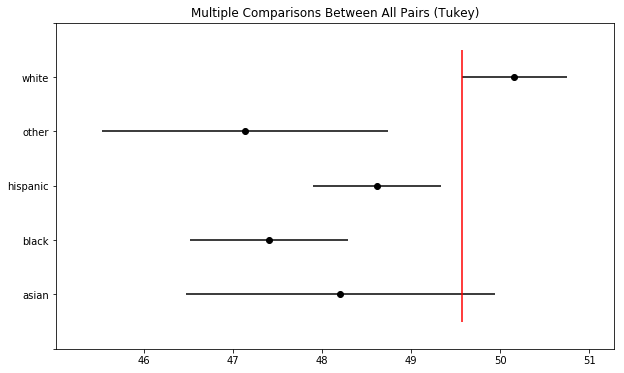

In [26]:
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

In [27]:
tukey.summary()              # See test summary

group1,group2,meandiff,lower,upper,reject
asian,black,-0.8032,-3.4423,1.836,False
asian,hispanic,0.4143,-2.1011,2.9297,False
asian,other,-1.0645,-4.2391,2.11,False
asian,white,1.9547,-0.4575,4.3668,False
black,hispanic,1.2175,-0.386,2.821,False
black,other,-0.2614,-2.7757,2.253,False
black,white,2.7579,1.3217,4.194,True
hispanic,other,-1.4789,-3.863,0.9053,False
hispanic,white,1.5404,0.3468,2.734,True
other,white,3.0192,0.7443,5.2941,True


In [ ]:
# with the above table, we reject the h0 in 3 pairs.
# all 3 groups are white and this group is slightly different from others

Anova with rea dataset

In [35]:
import pandas as pd
datafile = "C:/Users/Admin/Desktop/Machine Learning/Ann/Stats/7.Anova/PlantGrowth.csv"
data = pd.read_csv(datafile)

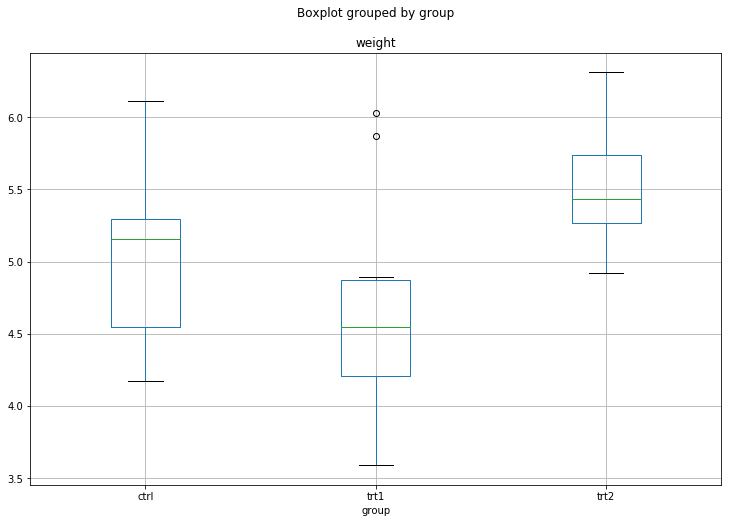

In [36]:
#EDA
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

In [39]:
ctrl = data['weight'][data.group == 'ctrl']

data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [44]:
grps = pd.unique(data.group.values)
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [48]:
data.head(10)

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


# One way Anova

In [14]:
## import library
import scipy.stats as stats



In [15]:
#Generate input data

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]


In [16]:
#one way anova
stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [ ]:
# inference :
# pvalue is less than 0.05, reject H0. all the mean is same

# Two way anova

In [19]:
import statsmodels.api as sm

from statsmodels.formula.api import ols



In [20]:
moore = sm.datasets.get_rdataset("Moore", "carData",cache=True) # load data

data = moore.data
data

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36
5,low,6,low,18
6,low,12,medium,51
7,low,4,medium,44
8,low,13,low,31
9,low,12,low,36


In [23]:
data = data.rename(columns={"partner.status": "partner_status"}) # rename the column name

In [24]:
# fit a model
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()

In [25]:
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame

In [26]:
table

,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2.0,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1.0,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2.0,4.184623,0.022572
Residual,817.763961,39.0,NaN,NaN


In [46]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('weight ~ group', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [49]:
# Pvalue < 0.015, its a goof fit or mean are same